<a href="https://colab.research.google.com/github/PratyushSinha8/customer_segmentation/blob/main/Iris_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from matplotlib import pyplot as plt


In [ ]:
iris=load_iris()

df=pd.DataFrame(data=iris.data, columns=iris.feature_names )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


K-Means to be found between Petal Length and Petal Width

In [ ]:
#extracting useful columns

df=df[['petal length (cm)', 'petal width (cm)']]
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [ ]:
#scaling the columns

scaler=MinMaxScaler()

scaler.fit(dfn[['petal length (cm)']])
df['petal length (cm)']=scaler.transform(dfn[['petal length (cm)']])

scaler.fit(dfn[['petal width (cm)']])
df['petal width (cm)']=scaler.transform(dfn[['petal width (cm)']])

df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [ ]:
#elbow plot formation to find best value of no. of clusters for k-means clustering

krange=range(1,10)
sse=[] #stores sum of squared errors
for k in krange:
  km=KMeans(n_clusters=k)
  km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
  sse.append(km.inertia_) #inertia is the sse of the current K-Means
sse

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1588792731667126,
 0.8535683225340073,
 0.6801035704886196,
 0.5663174952054538,
 0.48580845539143697,
 0.41363725779406146]

Text(0.5, 1.0, 'Elbow Plot')

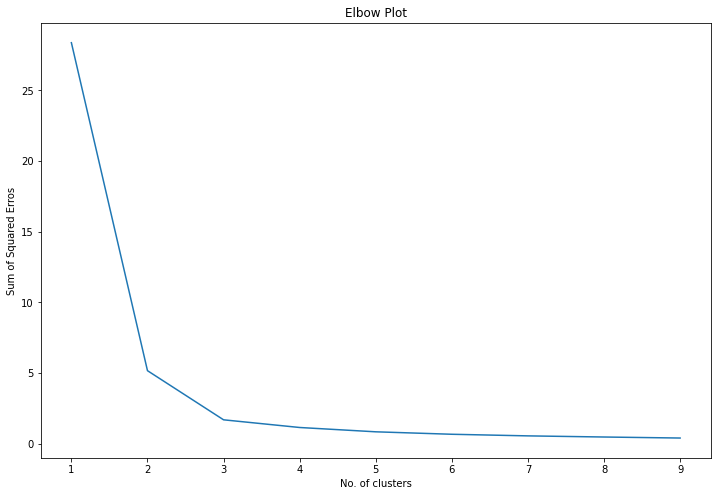

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(krange, sse)
plt.xlabel('No. of clusters')
plt.ylabel('Sum of Squared Erros')
plt.title('Elbow Plot')

#3 seems to be the 'elbow'


In [ ]:
#Adding Cluster column to dataframe considering 3 Clusters in total

km=KMeans(n_clusters=3)
df['Cluster']=km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])

df.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


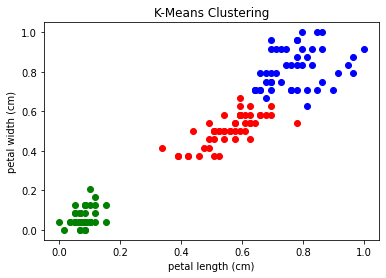

In [ ]:
#plotting scatter plot with different clusters

df1=df[df['Cluster']==0]
df2=df[df['Cluster']==1]
df3=df[df['Cluster']==2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='Blue')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='Green')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='Red')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('K-Means Clustering')

plt.show()
